## Zadanie 1 
A. Dopasujcie analogiczny model dla spalania.

In [1]:
import pandas as pd
import numpy as np

In [2]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

file_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
data = pd.read_csv(file_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [3]:
data = data.dropna()

In [4]:
Y = data.loc[:, 'MPG']
X = data.drop(columns=['MPG', 'Origin'])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [7]:
scaler = StandardScaler()
reg = LinearRegression()

estimator = make_pipeline(scaler, reg)
estimator.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

B. Jaki otrzymaliście błąd predykcji na zbiorze testowym (pierwiastek błędu średniokwadratowego)?

In [8]:
Y_pred = estimator.predict(X_test)
error = mean_squared_error(Y_pred, Y_test)
# pierwiastek ze średniego kwadratu błędu
np.sqrt(error)

3.400105199279451

In [9]:
estimator.steps

[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('linearregression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))]

In [10]:
coefficients = estimator.steps[-1][-1].coef_
coefficients

array([-0.28389137,  0.7629999 , -0.15406977, -5.82754107,  0.27586101,
        2.99625382])

In [11]:
list(zip(X.columns, coefficients))

[('Cylinders', -0.28389137039944035),
 ('Displacement', 0.7629999034781854),
 ('Horsepower', -0.15406976654374627),
 ('Weight', -5.827541065690263),
 ('Acceleration', 0.27586101201534563),
 ('Model Year', 2.996253816555854)]

C. Jakie czynniki mają największe znaczenie (największe wartości współczynników)? Czy mają one dodatni
czy negatywny wpływ na spalanie? Jak zinterpretujecie te wyniki?

Największy wpływ na MPG ma waga - im lżejsze auto, tym mniejsze spalanie.   Kolejnym czynnikiem jest rok modelu - im nowszy model, tym spalanie jest większe.  

## Zad. 2 

In [12]:
import numpy as np
import statistics as stats
from scipy import stats

A. Jaka jest korelacja pomiędzy liczbą cylindrów a przyśpieszeniem?

In [13]:
cyl = data['Cylinders']
acc = data['Acceleration']
stats.pearsonr(cyl, acc)

(-0.5046833793486446, 1.0090007235330708e-26)

Text(0, 0.5, 'Accelaration')

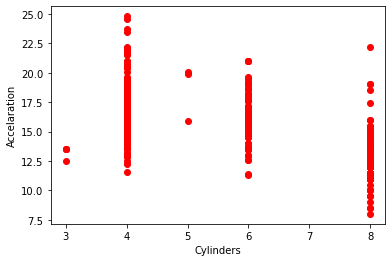

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.scatter(cyl,acc, color='r')
plt.xlabel('Cylinders')
plt.ylabel('Accelaration')

In [15]:
np.corrcoef(cyl,acc)

array([[ 1.        , -0.50468338],
       [-0.50468338,  1.        ]])

Korelacja jest ujemna, jednak nie wskazuje na silną zależność (-0.5)

B . Podzielcie dane na część zawierającą samochody, które mają 6 lub więcej cylindrów i resztę.

In [16]:
data_above_6cyl = data[data['Cylinders']>=6]

In [17]:
data_above_6cyl

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
365,20.2,6,200.0,88.0,3060.0,17.1,81,1
366,17.6,6,225.0,85.0,3465.0,16.6,81,1
386,25.0,6,181.0,110.0,2945.0,16.4,82,1
387,38.0,6,262.0,85.0,3015.0,17.0,82,1


In [18]:
data_below_6cyl = data[data['Cylinders']<6]

In [19]:
data_below_6cyl

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
14,24.0,4,113.0,95.0,2372.0,15.0,70,3
18,27.0,4,97.0,88.0,2130.0,14.5,70,3
19,26.0,4,97.0,46.0,1835.0,20.5,70,2
20,25.0,4,110.0,87.0,2672.0,17.5,70,2
21,24.0,4,107.0,90.0,2430.0,14.5,70,2
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


C. Jakie są średnie przyśpieszenia w obydwu grupach?

In [20]:
data_above_6cyl['Acceleration'].mean()

14.42741935483871

In [21]:
data_below_6cyl['Acceleration'].mean()

16.547087378640775

D. Narysujcie histogramy przyśpieszenia dla obydwu grup

Text(0, 0.5, 'Accelarations')

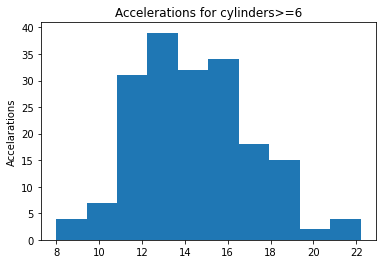

In [22]:
plt.hist(data_above_6cyl['Acceleration'])
plt.title('Accelerations for cylinders>=6')
plt.ylabel('Accelarations')

Text(0, 0.5, 'Accelarations')

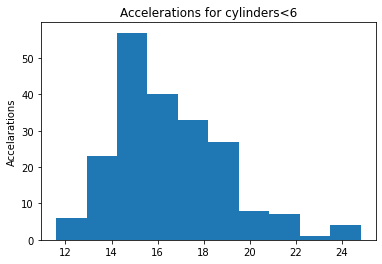

In [24]:
plt.hist(data_below_6cyl['Acceleration'])
plt.title('Accelerations for cylinders<6')
plt.ylabel('Accelarations')

E. Czy rozkłady przyśpieszenia w obydwu grupach mają rozkład normalny (czy są gaussowskie)? Zbadajcie
to przez wykres kwantylowy i w razie wątpliwości testem Shapiro-Wilka .

In [25]:
from statsmodels.graphics.gofplots import qqplot

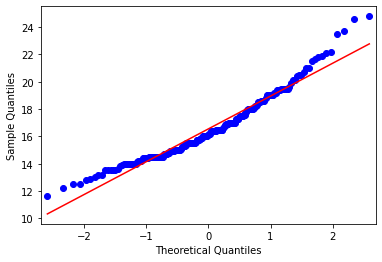

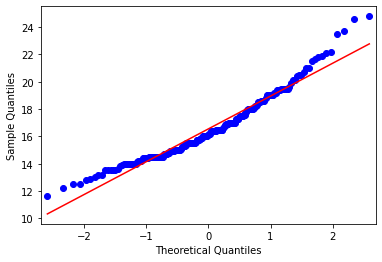

In [26]:
qqplot(data_below_6cyl['Acceleration'], line='s')

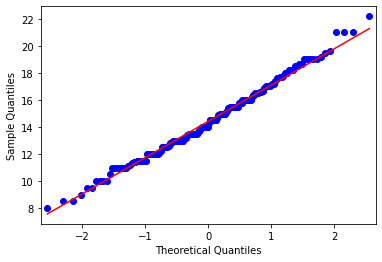

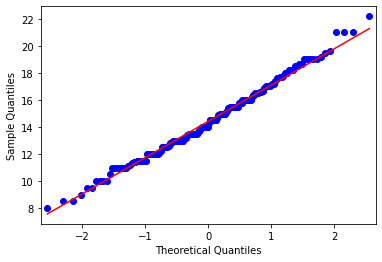

In [27]:
qqplot(data_above_6cyl['Acceleration'], line='s')

In [28]:
from scipy.stats import shapiro
stat, p = shapiro(data_below_6cyl['Acceleration'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.953, p=0.000
Probably not Gaussian


In [29]:
stat, p = shapiro(data_above_6cyl['Acceleration'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.992, p=0.375
Probably Gaussian


Rozkład Normalny jest dla rozkładu przyśpieszenia dla grupy gdzie liczba cylindrów jest większa, bądź równa 6.  

F. Jeżeli rozkłady są gaussowskie przeprowadźcie test t-Studenta a jeżeli nie, test Manna-Whitneya . Czy
różnice pomiędzy grupami są istotne statystycznie?

In [30]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(data_above_6cyl['Acceleration'], data_below_6cyl['Acceleration'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=10775.500, p=0.000
Probably different distributions


## Zadanie 3 
A. Narysujcie scatter plot dla roku produkcji v.s. spalanie \
B. Jaki jest współczynnik korelacji pomiędzy rokiem produkcji a spalaniem? Czy istnieje zależność i czy jest
ona dodatnia czy ujemna? \
C. Czy ten wynik był do przewidzenia, biorąc pod uwagę wcześniej wytrenowany model regresji liniowej dla
spalania, jeżeli tak, to dlaczego?

Text(0, 0.5, 'MPG')

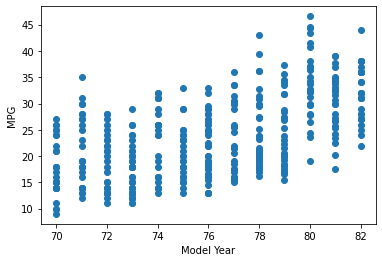

In [31]:
plt.scatter(data['Model Year'], data['MPG'])
plt.xlabel('Model Year')
plt.ylabel('MPG')

In [35]:
np.corrcoef(data['Model Year'],data['MPG'])

array([[1.        , 0.58054097],
       [0.58054097, 1.        ]])

Ad. B - Korelacja jest dodatnia, jednak otrzymany wynik = 0.58 nie wskazuje,że jest to silna korelacja \
Ad. C - Wynik ten  był do przewidzenia na podstawie analizy wartości parametrów dopasowania regresji liniowej - > wiersz 12 -> zaraz po wadze największe znaczenie dla spalania miał rocznik.